<a href="https://colab.research.google.com/github/skyjadel/chang-s_titanic/blob/main/Task_02_%E4%BD%9C%E6%A5%AD_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task #02 作業#01【實作題】鐵達尼號存活預測專題實作（1） - 環境準備
完成後也請你繳交今日的作業，直接複製底下格式填上內容、標題設定成「2024 Task#02 作業 01」：

這次的範例是一個專案等級的題目，我們建議可以使用 `Github` + `Colab` 進行操作。Github 是一個程式碼的雲端託管平台，Repository 是一個專案單位，我們能夠利用 Github 當成是簡單的程式碼作品集。Colab 是由 Google 維護的類似 Jupyter 環境整合式開發環境，提供在雲端網頁上執行進行 Python 程式。Colab 或 Jupyter 能夠以互動式程式執行環境，每次執行為一個區塊，適合像資料分析、資料探索需要大量互動操作資料的任務。可以依照以下步驟開始建立你的專案：

* 建立一個 GitHub 帳號，建立一個的「Repository」專案，存放這次練習的 實作專案

* 建立一個 Google Colab 程式碼，開始這次實作練習

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
for col in df.columns:
  element_list = set(list(df[col]))
  print(f'{col} has {len(element_list)} unique elements')

PassengerId has 891 unique elements
Survived has 2 unique elements
Pclass has 3 unique elements
Name has 891 unique elements
Sex has 2 unique elements
Age has 265 unique elements
SibSp has 7 unique elements
Parch has 7 unique elements
Ticket has 681 unique elements
Fare has 248 unique elements
Cabin has 148 unique elements
Embarked has 4 unique elements


In [4]:
for col in df.columns:
  na_counts = sum(df[col].isna())
  print(f'{col} has {na_counts} NaNs')

PassengerId has 0 NaNs
Survived has 0 NaNs
Pclass has 0 NaNs
Name has 0 NaNs
Sex has 0 NaNs
Age has 177 NaNs
SibSp has 0 NaNs
Parch has 0 NaNs
Ticket has 0 NaNs
Fare has 0 NaNs
Cabin has 687 NaNs
Embarked has 2 NaNs


初步判斷：<br>
PassengerId: 每個人都不同，並且之間沒有關聯，捨棄<br>
Name: Last name 有可能有關連，不過這個比較複雜，暫時捨棄<br>
Age: 891人中有177個NaN，可以保留<br>
SibSp, Parch：各有七種值，沒有NaN，保留<br>
Ticket：有681種離散值，在找到比較好的分類方法前先捨棄<br>
Fare：連續值，沒有NaN，保留<br>
Cabin：NaN太多，捨棄<br>
Embarked：四種離散值，中間沒有順序關係，只有兩個NaN，保留，應進行one hot encoding

In [5]:
avg_survived = np.mean(df['Survived'])
print(f'在這份資料中，有{avg_survived*100:.2f}%的乘客存活')

在這份資料中，有38.38%的乘客存活


In [6]:
import matplotlib.pyplot as plt
from scipy.stats import beta

In [7]:
def get_surv_err(N, s, confidence=0.68):
  epsilon=1e-7
  x = np.linspace(0, 1, 1001)
  y = beta.cdf(x, s+epsilon, N-s+epsilon)
  #plt.plot(x,y)
  lower_bound = (s/N) - x[np.argmin(np.abs(y-(1-confidence)/2))]
  upper_bound = x[np.argmin(np.abs(y-(1+confidence)/2))] - (s/N)
  if lower_bound < 0 or upper_bound < 0:
    print([lower_bound, upper_bound])
    print([N,s])
  return [lower_bound, upper_bound]

In [8]:
def plot_survive_hist_and_bar(df, col, bins):
  new_df = df[~df[col].isna()]
  survived = new_df[new_df['Survived']==1][col].tolist()
  not_survived = new_df[new_df['Survived']==0][col].tolist()

  y_mean = len(survived) / len(new_df)

  fig, axes = plt.subplots(1, 2)
  fig.set_size_inches(10,6)
  #bins = np.linspace(*x_linespace)

  ax = axes[0]
  counts_live, __, _ = ax.hist(survived, bins=bins, label='Survived')
  counts_dead, __, _ = ax.hist(not_survived, bins=bins, alpha=0.5, label='Not Survived')
  ax.legend()
  ax.set_xlabel(col)
  ax.set_ylabel('Person Counts')

  ax = axes[1]
  y_err = np.transpose([get_surv_err(counts_live[i]+counts_dead[i], counts_live[i]) for i in range(len(counts_live))])
  survive_rate = [counts_live[i]/(counts_live[i]+counts_dead[i]) for i in range(len(counts_live))]

  for i in range(len(counts_live)):
    if survive_rate[i] - y_err[0][i] < 0:
      y_err[0][i] = survive_rate[i]

  bin_middle = list((bins[1::] + bins[0:-1])/2)
  width = 0.5 * (bins[1]-bins[0])
  ax.bar(bin_middle, survive_rate, width = width, yerr=y_err)
  ax.plot(bins, [y_mean] * bins.shape[0], ':k')
  ax.set_ylabel('Survival Rate')
  ax.set_xlabel(col)

In [105]:
def plot_survive_bar_by_type(df, col, types=None):
  df = df[~df[col].isna()]
  y_mean = np.mean(df['Survived'])
  if types is None:
    types = list(set(df[col]))
  survive_matrix = {}
  for t in types:
    s = sum(df[df[col]==t]['Survived'])
    d = len(df[df[col]==t]) - s
    survive_matrix[t] = {'Lived':s, 'Dead':d}
  survive_df = pd.DataFrame(survive_matrix)

  fig, axes = plt.subplots(1,2)
  fig.set_size_inches(10,6)

  ax = axes[0]
  width = 0.35
  x = np.array([*range(len(types))])
  ax.bar(x - width/2, survive_df.loc['Lived'], width=width, label='Lived')
  ax.bar(x + width/2, survive_df.loc['Dead'], width=width, label='Dead')
  ax.set_xticks(x)
  ax.set_xticklabels(types)
  ax.legend()
  ax.set_xlabel(col)
  ax.set_ylabel('Person Counts')

  ax = axes[1]
  survive_rate = [survive_df.loc['Lived'][t]/sum(survive_df[t]) for t in survive_df.columns]
  y_err = np.transpose([get_surv_err(sum(survive_df[t]), survive_df.loc['Lived'][t]) for t in survive_df.columns])
  ax.bar(x, survive_rate, width=width, yerr=y_err)
  ax.plot([x[0]-0.5, x[-1]+0.5], [y_mean, y_mean], ':k')
  ax.set_xticks(x)
  ax.set_xticklabels(types)
  ax.set_xlabel(col)
  ax.set_ylabel('Survival Rate')

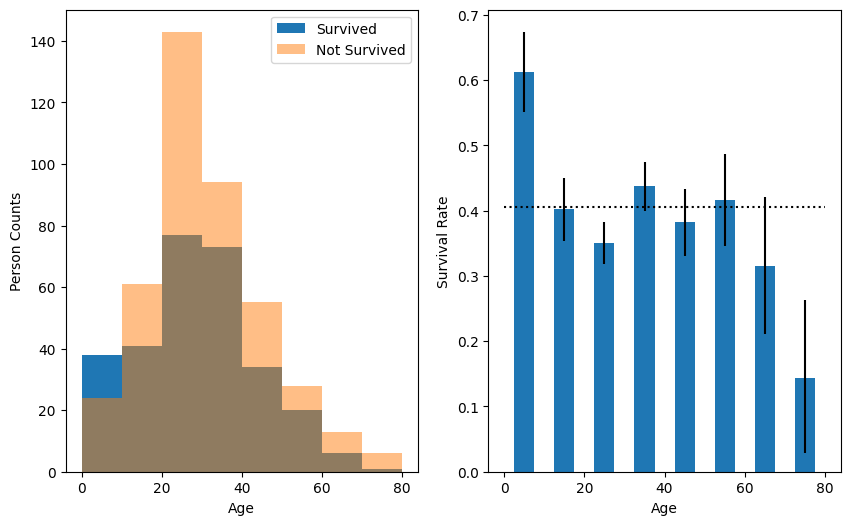

In [73]:
plot_survive_hist_and_bar(df, 'Age', np.linspace(0, 80, 9))

年齡相關部分：<br>
以上圖表顯示10歲以下乘客的生還率明顯較高，70歲以上的乘客生還率明顯較低

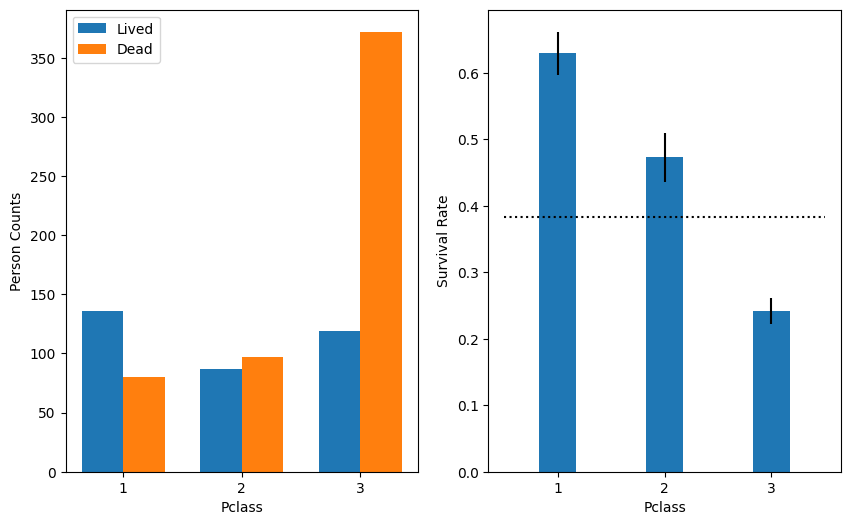

In [76]:
plot_survive_bar_by_type(df, 'Pclass')

艙等部分：艙等越高，越有可能生還

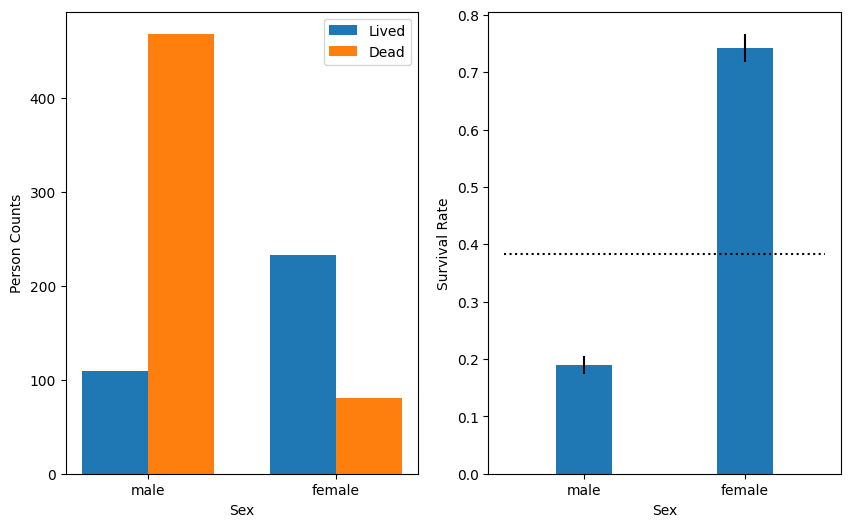

In [77]:
plot_survive_bar_by_type(df, 'Sex')

女性生還率高於男性

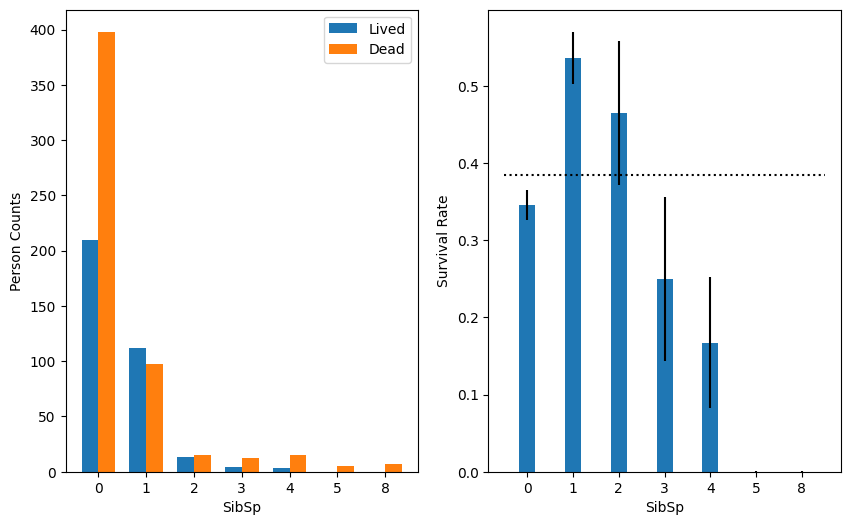

In [78]:
plot_survive_bar_by_type(df, 'SibSp')

有一個配偶/手足的乘客生還率較高？有太多手足似乎不利於生還

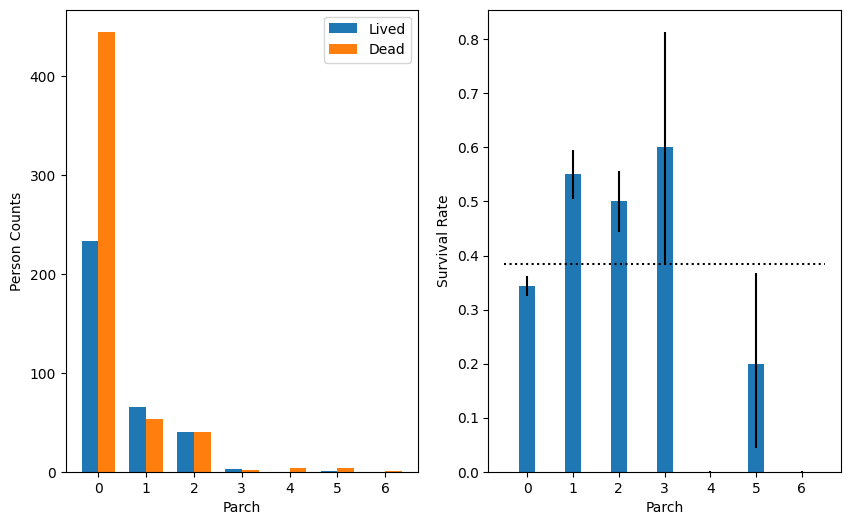

In [79]:
plot_survive_bar_by_type(df, 'Parch')

有一或兩個雙親或子女的乘客，生還率較高？

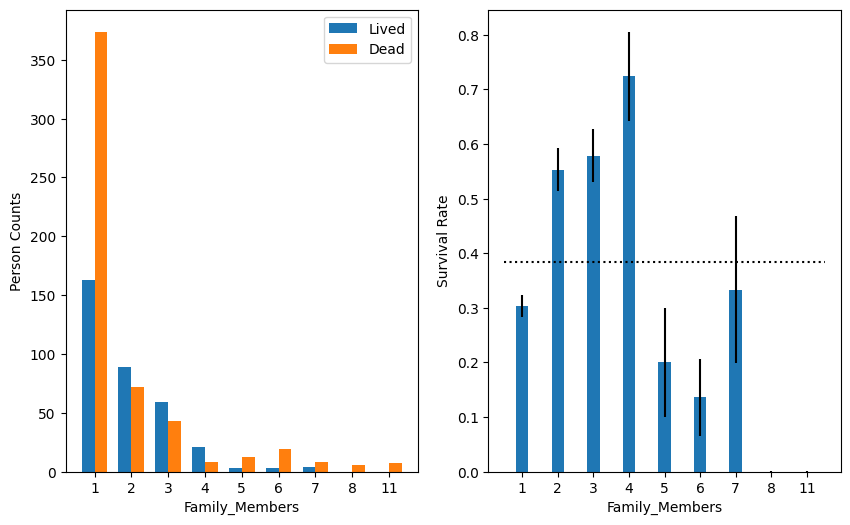

In [80]:
new_df = df * 1
new_df['Family_Members'] = 1 + df['SibSp'] + df['Parch']
plot_survive_bar_by_type(new_df, 'Family_Members')

單人登船，或是家族成員有五人以上，生還率都比較低

In [101]:
fare_bins = [0, 20, 50, 75, 100, 200, 600]
type_dict = {i: f'{fare_bins[i]}~{fare_bins[i+1]}' for i in range(len(fare_bins)-1)}
new_df['Fare_Range'] = 0
for i in new_df.index:
  this_fare = df.loc[i]['Fare']
  fare_type = type_dict[len(np.where(np.array(fare_bins) <= this_fare)[0]) - 1]
  new_df.loc[i, 'Fare_Range'] = fare_type
  #print([this_fare, fare_type])

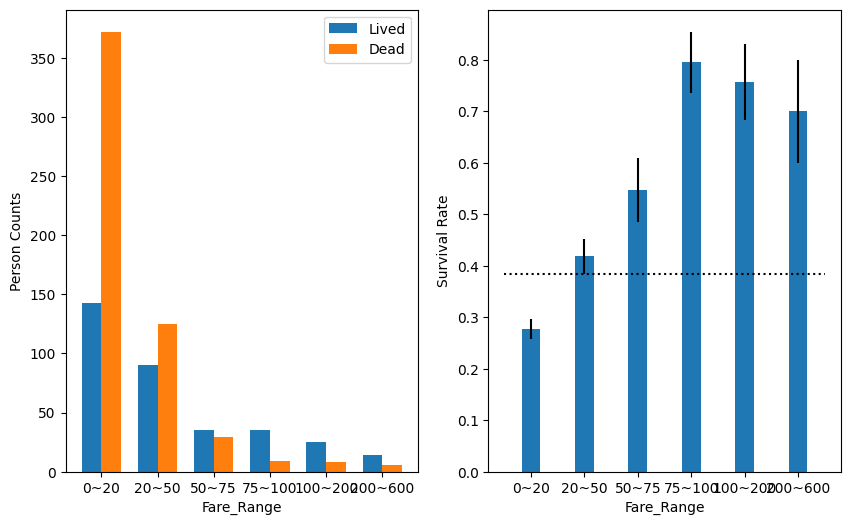

In [113]:
plot_survive_bar_by_type(new_df, 'Fare_Range', list(type_dict.values()))

票價越高者，存活機率越大

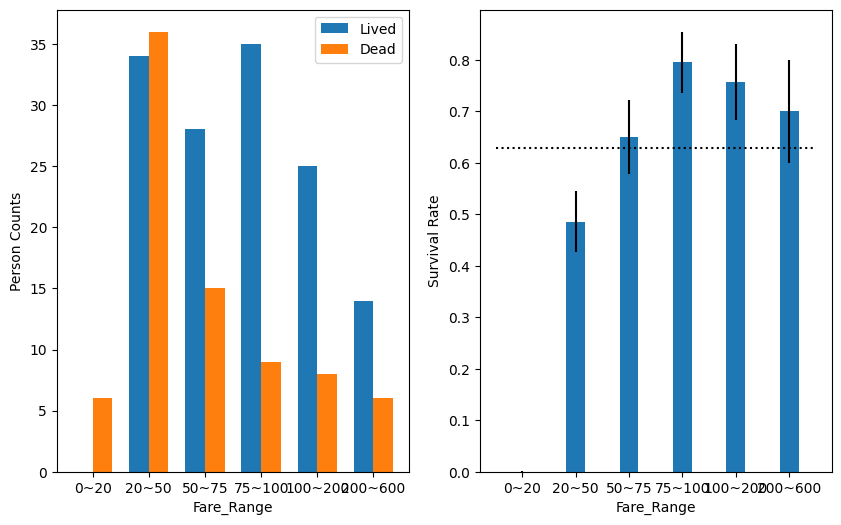

In [114]:
plot_survive_bar_by_type(new_df[new_df['Pclass']==1], 'Fare_Range', list(type_dict.values()))

就連同在頭等艙，票價50元以下的乘客生還率都比較低

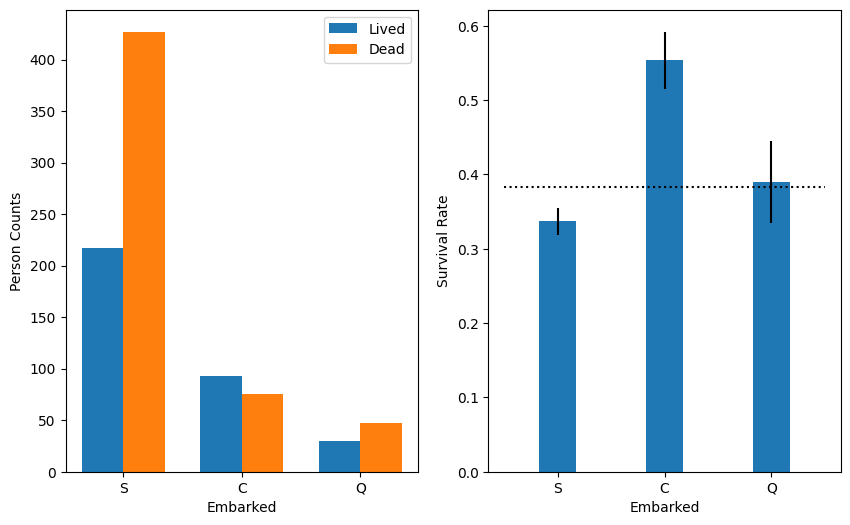

In [115]:
plot_survive_bar_by_type(df, 'Embarked')

在C港(Cherbourg)上船的旅客生還率比較高

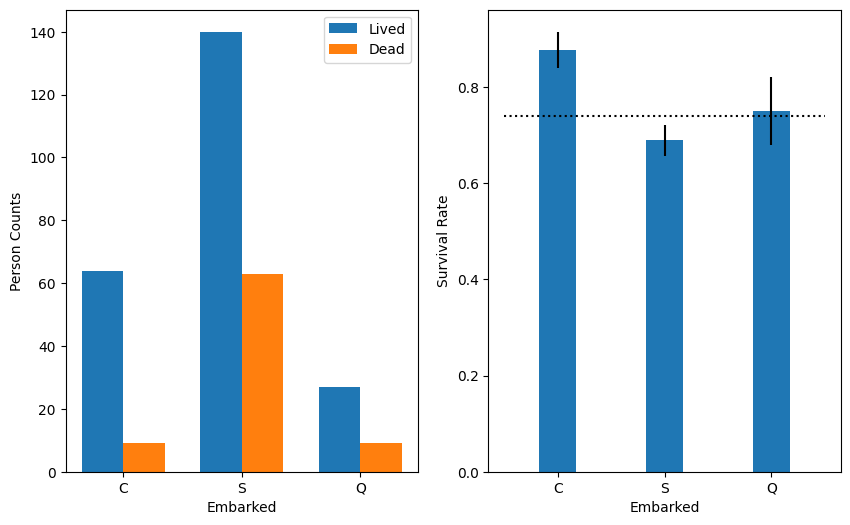

In [121]:
plot_survive_bar_by_type(df[df['Sex']=='female'], 'Embarked')

有很大一部分原因是因為在C港上船的女性比較多

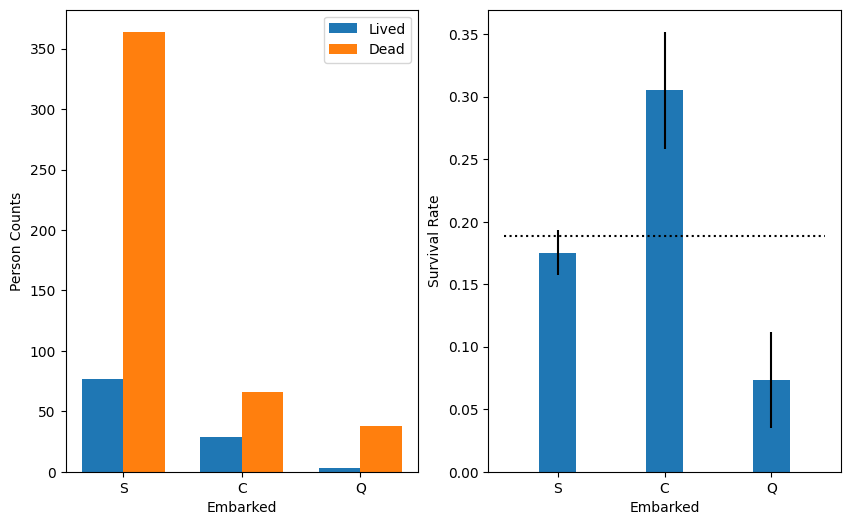

In [122]:
plot_survive_bar_by_type(df[df['Sex']=='male'], 'Embarked')

不過在C港上船的男性生還的比例也比其他兩港高